In [1]:
import matplotlib._color_data as mcd
import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np
import pandas as pd
import os
os.chdir("C:\\Users\\Zber\\Documents\\Dev_program\\OpenRadar")

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.ticker as ticker

In [2]:
n_classes = 7
classes = [i for i in range(7)]
lw = 3
res_path = "C:/Users/Zber/Documents/Dev_program/OpenRadar/FER/results"
ours_path = os.path.join(res_path,"Supervision_SUM_image2D_ours_baseline_20220609-013025")
unsuper_path = os.path.join(res_path,"Supervision_SUM_image2D_unsupervised_baseline_20220608-205434")

landmark_path = os.path.join(res_path,"Supervision_heatmap_landmark_baseline_20220608-102041")
kd_path = os.path.join(res_path,"Supervision_SUM_image2D_KD_baseline_20220608-223236")

In [3]:
kd_csv_path = os.path.join(kd_path,'metrics.csv')
kd_df = pd.read_csv (kd_csv_path, sep='\t')

In [4]:
ours_csv_path = os.path.join(ours_path,'metrics.csv')
ours_df = pd.read_csv (ours_csv_path, sep='\t')


unsuper_csv_path = os.path.join(unsuper_path,'metrics.csv')
unsuper_df = pd.read_csv (unsuper_csv_path, sep='\t')


landmark_csv_path = os.path.join(landmark_path,'metrics.csv')
landmark_df = pd.read_csv (landmark_csv_path, sep='\t')


kd_csv_path = os.path.join(kd_path,'metrics.csv')
kd_df = pd.read_csv (kd_csv_path, sep='\t')


un_test_acc = np.asarray(unsuper_df['test_acc'])
x = np.arange(1,51,1)

kd_test_ac = np.asarray(ours_df['test_acc'])
landmark_test_ac = np.asarray(landmark_df['precision'])

our_test_acc =  np.asarray(kd_df['test_acc'])

f = np.linspace(1,86.36/80.99, 25)
f1 = np.linspace(1, 0.9, 25)
a= 0
for i in range(25, 50):

    our_test_acc[i]  = our_test_acc[i] * f[a] 
    a+=1


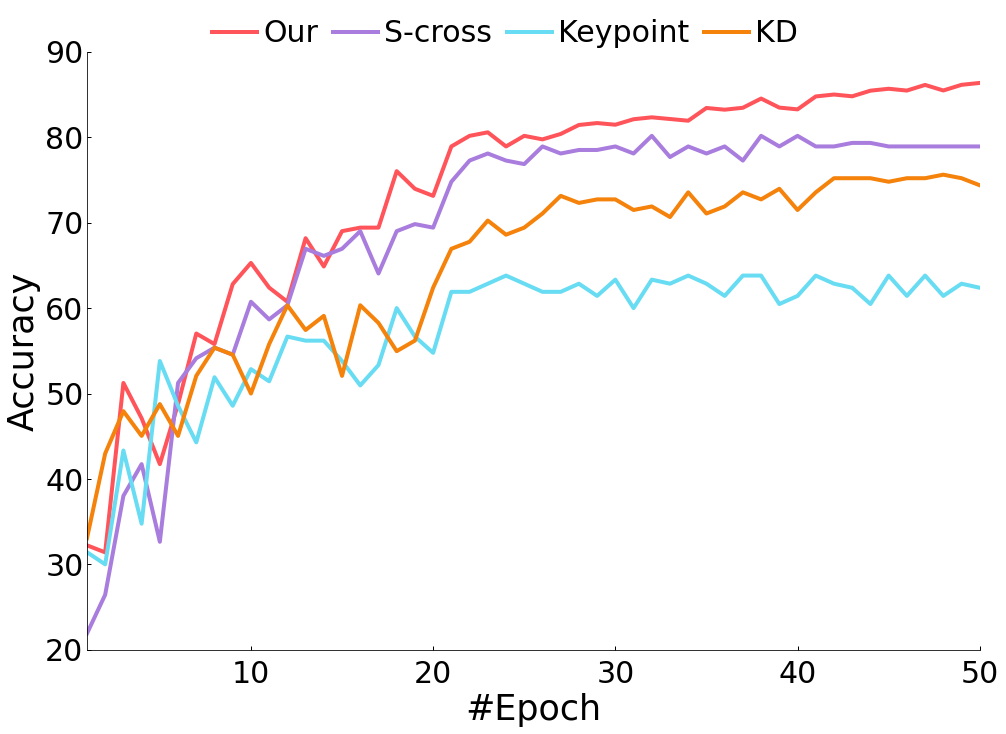

In [5]:
# ax.fill_between(x, y-error, y+error, alpha=0.2, edgecolor=color, facecolor=color)
# landmark + label overfitting
colors = ['#53a8fb', '#a97ddd', '#64c44b', '#68dcf2', "#F4820B", "#FF545A", "#C775FF"]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 11))
ax.set_facecolor("none")
ax2 = ax.twinx()
l = ['Our', 'S-cross', 'Keypoint', 'KD']


lw = 4

ax.plot()

ax.plot()

ax.plot()

ax.plot()


ax2.plot(x, our_test_acc, color=colors[5], linestyle='solid',
        fillstyle='none', label=l[0], linewidth=lw)


ax2.plot(x, un_test_acc, color=colors[1], linestyle='solid',
        fillstyle='none', label=l[1], linewidth=lw)


ax2.plot(x, landmark_test_ac, color=colors[3],  linestyle='solid',
         label=l[2], linewidth=lw)

ax2.plot(x, kd_test_ac, color=colors[4],  linestyle='solid',
         label=l[3], linewidth=lw)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax2.axhline(y = y, color=colors[2], linewidth=lw)


ax.set_ylabel("Accuracy", fontsize=35)
ax.set_xlabel("#Epoch", fontsize=35)

ax.set_xlim(1, 50)
handles, labels = ax.get_legend_handles_labels()
H = handles
L = labels 

ax.set_ylim(20, 90)

ax.yaxis.set_tick_params(labelsize=30, length=4, direction='in', width=1)

ax.xaxis.set_tick_params(labelsize=30, length=4, direction='in', width=1, pad=10)


ax.legend(H, L, loc="upper left", prop={'size': 30, }, ncol=4, bbox_to_anchor=(0.11, 1.10), fancybox=True,
               framealpha=0.0, labelspacing=0.1, handletextpad=0.2, columnspacing=0.5, handlelength=1.5)

# fig.savefig('C:/Users/Zber/Desktop/mmEmo_Exp/0.Method/m2_3.pdf',format='pdf', bbox_inches="tight")
fig.savefig('C:/Users/Zber/Desktop/mmEmo_Exp/0.Method/Fig5.svg',format='svg', bbox_inches="tight")

In [41]:
print(our_test_acc[-1])
print(un_test_acc[-1])
print(landmark_test_ac[-1])
print(kd_test_ac[-1])

86.36185061108452
78.92561983471074
62.38095238095238
74.3801652892562


In [ ]:

# ax.fill_between(x, y-error, y+error, alpha=0.2, edgecolor=color, facecolor=color)
# landmark + label overfitting
colors = ['#53a8fb', '#a97ddd', '#64c44b', '#68dcf2', "#F4820B", "#FF545A", "#C775FF"]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 11))

ax.set_facecolor("none")

name2 = "Keypoint"

lw = 4

ax.plot(x, train_loss, color=colors[0], linestyle='solid',
        fillstyle='none', label='{} train loss'.format(name2), linewidth=lw)


ax.plot(x, test_loss, color=colors[5], linestyle='solid',
        fillstyle='none', label='{} test loss'.format(name2), linewidth=lw)





ax.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

# ax2.axhline(y = y, color=colors[2], linewidth=lw)


ax.set_ylabel("Cross entropy loss", fontsize=35)
ax.set_xlabel("#Epoch", fontsize=35)
ax2.set_ylabel("Accuracy", fontsize=35, rotation=270, labelpad=20)

ax.set_xlim(1, 50)
ax2.set_xlim(1, 50)
handles, labels = ax.get_legend_handles_labels()
new_handles, new_labels = ax2.get_legend_handles_labels()
H = handles + new_handles
L = labels + new_labels


# L, H = zip(*sorted(zip(L, H), key=lambda t: t[0]))

# L = np.asarray(L)
# H = np.asarray(H)
# temp = L[-1]
# L[-1] = L[0]
# L[0] = temp

# temp = H[-1]
# H[-1] = H[0]
# H[0] = temp

ax.yaxis.set_tick_params(labelsize=30, length=4, direction='in', width=1)
ax2.yaxis.set_tick_params(labelsize=30, length=4, direction='in', width=1, pad=10)
ax.xaxis.set_tick_params(labelsize=30, length=4, direction='in', width=1, pad=10)
ax2.xaxis.set_tick_params(labelsize=30, length=4, direction='in', width=1)
ax2.set_ylim(0, 100)

ax.legend(H, L, loc="upper left", prop={'size': 30, }, ncol=3, bbox_to_anchor=(-0.08, 1.13), fancybox=True,
               framealpha=0.0, labelspacing=0.1, handletextpad=0.2, columnspacing=0.5, handlelength=1.5)

# fig.savefig('C:/Users/Zber/Desktop/mmEmo_Exp/0.Method/m2_3.pdf',format='pdf', bbox_inches="tight")
fig.savefig('C:/Users/Zber/Desktop/mmEmo_Exp/0.Method/Fig4.svg',format='svg', bbox_inches="tight")


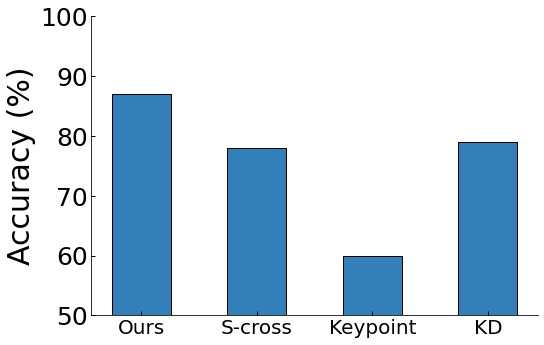

In [27]:

acc = np.asarray([0.87 , 0.78, 0.60, 0.79]) * 100

colors = ["#F4820B", "#FF545A", "#4CB44C","#337FBA" ,"#C775FF"]
label = ['Ours', 'S-cross', 'Keypoint', 'KD']

fig, ax = plt.subplots(figsize=(8, 5.5))
ind = np.linspace(2,3,4)
# np.arange(1,len(sit+1))*0.9  # the x locations for the groups
width = 0.17
rects1 = ax.bar(ind, acc, width, edgecolor='black', color=colors[-2],
                label='Accuracy', linewidth=1)


ax.set_ylabel("Accuracy (%)",fontsize=30)
ax.set_xticks(ind)
ax.set_xticklabels(label,fontsize=30)


# ax.legend(loc="upper left", prop={'size': 25,},ncol=3,bbox_to_anchor=(0.15, 1.2),fancybox=True, framealpha=0.0,labelspacing=0.1,handletextpad = 0.3,columnspacing=0.5,handlelength = 1.1)
# ax.legend(loc="upper center", prop={'size': 20,},ncol=3,bbox_to_anchor=(0.5, 1.2),fancybox=True, framealpha=0.0,labelspacing=0.1 ,handletextpad = 0.2)

ax.set_ylim(50, 100)
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.yaxis.set_tick_params(labelsize=25, length=4, direction='in', width=1)
ax.xaxis.set_tick_params(labelsize=20, length=4, direction='in', width=1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.savefig('C:/Users/Zber/Desktop/mmEmo_Exp/0.Method/Fig4.svg',format='svg', bbox_inches="tight")

    


NameError: name 'f_micro' is not defined

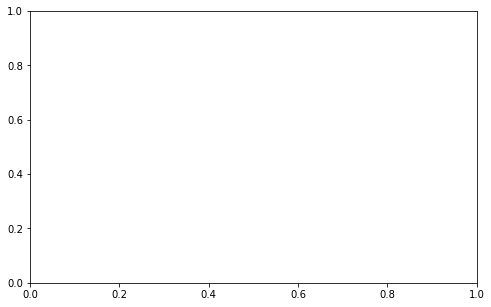

In [15]:
fig, ax = plt.subplots(figsize=(8, 5))
colors = ["#F4820B", "#FF545A", "#4CB44C","#337FBA" ,"#C775FF"]
label = ['Ours', 'S-cross', 'Keypoint', 'KD']
i = 0

for fpr, tpr, roc, c in zip(f_micro, t_micro, roc_auc, colors):
    ax.plot(fpr, tpr, c=c, linewidth=2, label ="{} (area={:.2f})".format(label[i],roc))
    i= i+1

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


In [37]:
t_micro[0]

array([0.        , 0.86363636, 1.        ])